
# set things up and get the data

In [51]:
%%time
from Startup import *
from matplotlib import pyplot as plt
import csv
import numpy as np
import scipy.stats
# from scipy.stats import zscore

%matplotlib inline
# df = sqlContext.sql("SELECT * FROM parquet.`s3://philipp-ghcnd/GHCND_WT08_1960_2020_US.parquet`")

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.02 ms


In [82]:
# %%time
# ghcnd_stations_file = "/mnt/d/02_acads/3.SP-20/dsc291/Public-DSC291/Data/ghcnd-stations.txt"
# stations_df = pd.DataFrame(columns = ["station_id","state"])
# with open(ghcnd_stations_file, 'r') as f:
#     reader=csv.reader(f)
#     for item in reader:
#         item = str(item)
# #         row = item[2:13], item[13:22], item[22:32], item[32:39], item[40:42], item[43:],
#         row = [item[2:13], item[40:42]]
# #         print(row)
#         stations_df.loc[len(stations_df)] = row
    
# stations_df.to_pickle("/mnt/d/02_acads/3.SP-20/dsc291/Public-DSC291/Data/stations_states.pkl")

CPU times: user 19min 16s, sys: 7.36 s, total: 19min 24s
Wall time: 23min 31s


In [85]:
stations_df = pd.read_pickle("/mnt/d/02_acads/3.SP-20/dsc291/Public-DSC291/Data/stations_states.pkl")
stations_df.head()

,station_id,state
0,ACW00011604,
1,ACW00011647,
2,AE000041196,
3,AEM00041194,
4,AEM00041217,


In [ ]:
### To be completed

In [33]:
query =""" SELECT * FROM parquet.`/mnt/d/02_acads/3.SP-20/dsc291/Public-DSC291/Data/GHCND_WT08_1960_2020_US.parquet/` 
WHERE year >= 2006
"""
df = sqlContext.sql(query)
pdf = df.toPandas()

# pdf.head()
pdf['Station'].unique()

CPU times: user 125 ms, sys: 93.8 ms, total: 219 ms
Wall time: 956 ms


array(['USW00014735', 'USW00014736', 'USW00014737', 'USW00014739',
       'USW00014740', 'USW00014742', 'USW00014745', 'USW00014747',
       'USW00014748', 'USW00014750', 'USW00014751', 'USW00014752',
       'USW00014753', 'USW00014755', 'USW00014756', 'USW00014757',
       'USW00014758', 'USW00014762', 'USW00014763', 'USW00014764',
       'USW00014765', 'USW00014768', 'USW00014770', 'USW00014771',
       'USW00014775', 'USW00014777', 'USW00014778', 'USW00014787',
       'USW00014792', 'USW00014793', 'USW00014794', 'USW00014813',
       'USW00014815', 'USW00014819', 'USW00014820', 'USW00014821',
       'USW00014822', 'USW00014825', 'USW00014826', 'USW00014827',
       'USW00014829', 'USW00014833', 'USW00014835', 'USW00014836',
       'USW00014837', 'USW00014839', 'USW00014840', 'USW00014841',
       'USW00014842', 'USW00014845', 'USW00014847', 'USW00014848',
       'USW00014850', 'USW00014852', 'USW00014853', 'USW00014858',
       'USW00014860', 'USW00014880', 'USW00014891', 'USW000148

In [8]:
%%time
from Startup import *
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats
# from scipy.stats import zscore

%matplotlib inline
# df = sqlContext.sql("SELECT * FROM parquet.`s3://philipp-ghcnd/GHCND_WT08_1960_2020_US.parquet`")

query =""" SELECT * FROM parquet.`/mnt/d/02_acads/3.SP-20/dsc291/Public-DSC291/Data/GHCND_WT08_1960_2020_US.parquet/` 
WHERE station = 'USW00014735' and year >= 2006
"""
df = sqlContext.sql(query)
pdf = df.toPandas()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 525 ms


## I exported the dataframe in string data type because that's the only thing that worked, so convert back...

In [9]:
print(pdf.head())
# pdf.iloc[100:104]
# print(pdf.describe())
# len(list(pdf.iloc[1]['Values'].split(',')))
# pdf.iloc[1]['Values']

       Station  year                                             Values
0  USW00014735  2006  [1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, ...
1  USW00014735  2007  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
2  USW00014735  2008  [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
3  USW00014735  2009  [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, ...
4  USW00014735  2010  [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...


In [10]:
%%time
from ast import literal_eval
pdf['Values'] = pdf['Values'].apply(literal_eval) # think I saved it as string

CPU times: user 46.9 ms, sys: 0 ns, total: 46.9 ms
Wall time: 37.4 ms


In [11]:
print(pdf.head())

wt08_graphs=[]
for i in range(pdf.shape[0]):
    wt08_graphs.append(pdf.iloc[i,2])
wt08_graphs=np.stack(wt08_graphs)

print(wt08_graphs.shape)

       Station  year                                             Values
0  USW00014735  2006  [1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, ...
1  USW00014735  2007  [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
2  USW00014735  2008  [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
3  USW00014735  2009  [1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, ...
4  USW00014735  2010  [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ...
(15, 365)


## compute num of stations by year  and Mean number of days smog was reported

In [12]:
years = np.unique(pdf['year'])
print(years)

['2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015'
 '2016' '2017' '2018' '2019' '2020']


In [13]:
%%time
wt08_count_byyear =[]
num_stations_byyear= []
for year in years:
    wt08_count_thisyear = []
    station_count_thisyear = 0
    for i in range(wt08_graphs.shape[0]):
        if pdf['year'][i] == year:
            station_count_thisyear +=1
            wt08_count_thisyear.append(np.sum(wt08_graphs[i,:]))
    wt08_count_byyear.append(np.mean(wt08_count_thisyear))
    num_stations_byyear.append(station_count_thisyear)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 23.3 ms


In [14]:
# print(wt08_count_byyear)
print(np.sum(num_stations_byyear)) # for verification

15


In [15]:
# fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
# ax1 = plt.subplot(211)
# years = map(lambda x: int(x), years)
# years = list(years)
# ax1.plot(years[:-1],wt08_count_byyear[:-1],color='black',linestyle='-')
# ax1.set_title('Mean number of days smog/haze detected in the US by year')
# ax1.set_ylabel('Number of days')
# ax1.set_xlabel('year')
# plt.xticks(np.arange(min(years), max(years)+1, 5.0))
# # fig.autofmt_xdate()

# ax2 = plt.subplot(212)
# # ax1 = fig1.add_axes([0,1,1,1])
# ax2.plot(years[:-1],num_stations_byyear[:-1],color='black',linestyle='-')
# ax2.set_title('Total number of station in US by year')
# ax2.set_ylabel('Number of Stations')
# ax2.set_xlabel('year')
# plt.xticks(np.arange(min(years), max(years)+1, 5.0))
# plt.tight_layout() 

No handles with labels found to put in legend.


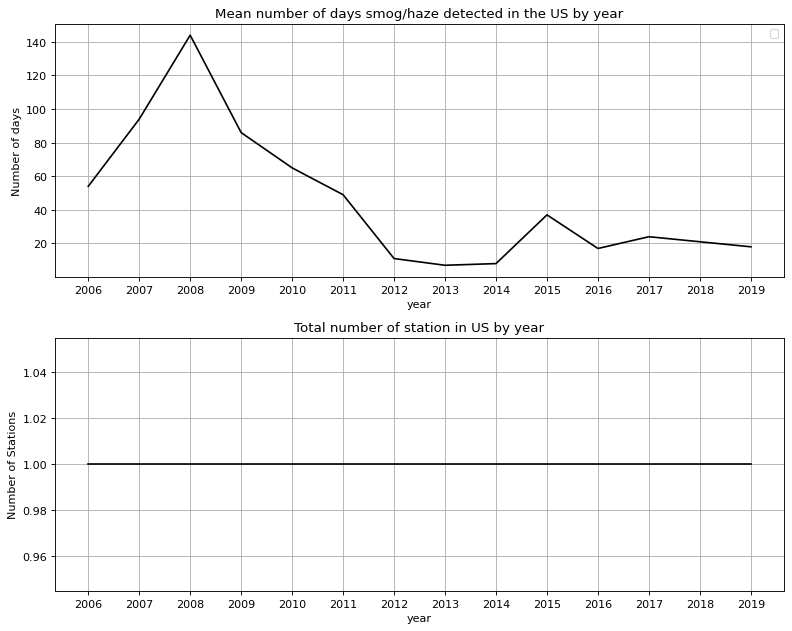

In [16]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(211)
ax1.plot(years[:-1],wt08_count_byyear[:-1],color='black',linestyle='-')
ax1.set_title('Mean number of days smog/haze detected in the US by year')
ax1.set_ylabel('Number of days')
ax1.set_xlabel('year')
ax1.grid()
ax1.legend()
# plt.xticks(np.arange(min(years), max(years)+1, 5.0))
# fig.autofmt_xdate()

ax2 = plt.subplot(212)
# ax1 = fig1.add_axes([0,1,1,1])
ax2.plot(years[:-1],num_stations_byyear[:-1],color='black',linestyle='-')
ax2.set_title('Total number of station in US by year')
ax2.set_ylabel('Number of Stations')
ax2.set_xlabel('year')
ax2.grid()
# plt.xticks(np.arange(min(years), max(years)+1, 5.0))
plt.tight_layout() 

The spike in 2005 is correlated to sudden increase in number of stations. My hypothesis is that most of these new stations are were located in smog area. Maybe?
However it does not explain the drop after 2012.

## compute means by year

In [17]:
%%time
wt08_byyear=[]
wt08_yearmean = []
years = np.unique(pdf['year'])
for year in years:
    wt08_thisyear = []
    for i in range(wt08_graphs.shape[0]):
        if pdf['year'][i] == year:
            wt08_thisyear.append(wt08_graphs[i,:])
    wt08_byyear.append(np.mean(wt08_thisyear, axis=0))
    wt08_yearmean.append(np.mean(wt08_thisyear))
wt08_byyear=np.stack(wt08_byyear)

print(wt08_byyear.shape)

(15, 365)
CPU times: user 31.2 ms, sys: 15.6 ms, total: 46.9 ms
Wall time: 15.6 ms


## plot overall mean by year 

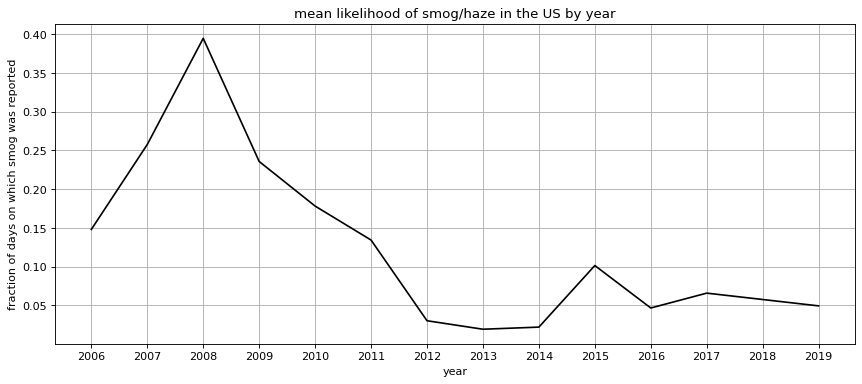

In [18]:
fig1 = plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig1.add_axes([0,0,1,1])
ax1.plot(years[:-1],wt08_yearmean[:-1],color='black',linestyle='-')
ax1.set_title('mean likelihood of smog/haze in the US by year')
ax1.set_ylabel('fraction of days on which smog was reported')
ax1.set_xlabel('year')
ax1.grid()

## plot by day

In [19]:
wt08_byyear_mean = np.mean(wt08_byyear[:-1,:], axis=0)
wt08_byyear_std = np.std(wt08_byyear[:-1,:], axis=0)

In [20]:
from matplotlib import cm
colmap = cm.get_cmap('jet', len(years)-1)
colors = colmap(range(len(years)-1))

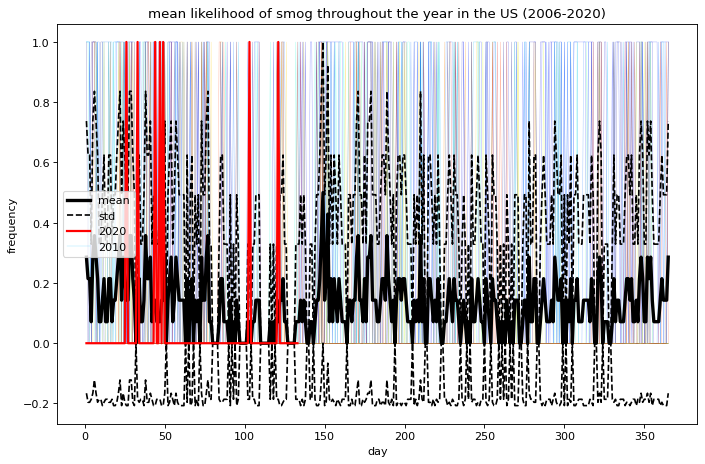

In [21]:
fig2 = plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')
ax2 = fig2.add_axes([0,0,1,1])
theLines = []
for i in range(len(years)-1):
    yrplot, = ax2.plot(np.arange(1,366),wt08_byyear[i,:],color=colors[i,:3],alpha=0.5,lw=0.3,label=str(years[i]))
    if int(years[i]) % 10 == 0:
        theLines.append(yrplot)
stdplot, = ax2.plot(np.arange(1,366),wt08_byyear_mean+wt08_byyear_std,color='black',linestyle='--',label='std')
ax2.plot(np.arange(1,366),wt08_byyear_mean-wt08_byyear_std,color='black',linestyle='--')
meanplot, = ax2.plot(np.arange(1,366),wt08_byyear_mean,color='black',lw=3,label='mean')
mean2020, = ax2.plot(np.arange(1,134),wt08_byyear[-1,:133],color='red',alpha=1,lw=2,label='2020')
ax2.set_title('mean likelihood of smog throughout the year in the US (2006-2020)')
ax2.set_ylabel('frequency')
ax2.set_xlabel('day')
allLines = [meanplot, stdplot, mean2020]
for i in range(len(theLines)):
    allLines.append(theLines[i])
ax2.legend(handles=allLines)

# Z-test

In [22]:
wt08_2020 = wt08_byyear[-1,:133]
wt08_2020.shape
wt08_byyear_mean.shape
wt08_byyear_std.shape

z_scores = ( wt08_2020 - wt08_byyear_mean[:len(wt08_2020)] ) / wt08_byyear_std[:len(wt08_2020)] 

/home/ubuntu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [23]:
z_scores.shape

(133,)

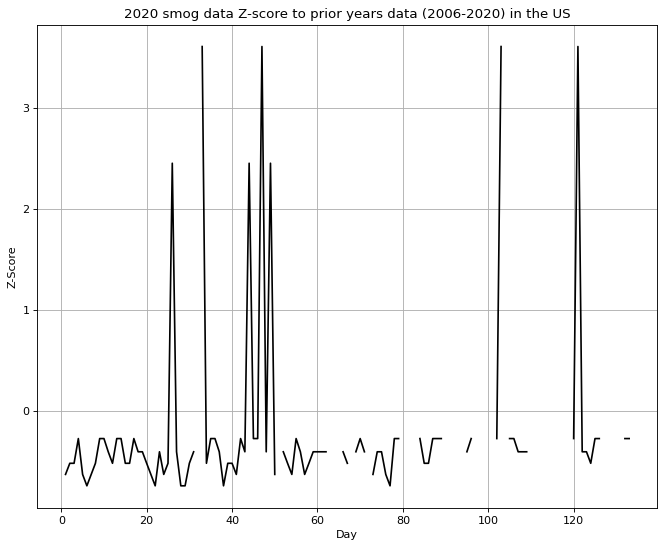

In [24]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
days = np.arange(1,len(z_scores)+1, 1)
ax.plot(days,z_scores,color='black',linestyle='-')
ax.set_title('2020 smog data Z-score to prior years data (2006-2020) in the US')
ax.set_ylabel('Z-Score')
ax.set_xlabel('Day')
ax.grid()
# ax.set_xticks(np.arange(min(days), max(days)+1, 5.0))

In [25]:
p_values = scipy.stats.norm.sf(abs(z_scores)) #one-sided

# p_values = scipy.stats.norm.sf(abs(z_scores))*2 #twosided

mean_p_value = np.mean(p_values)
print(mean_p_value)

nan


/home/ubuntu/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/ubuntu/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/ubuntu/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


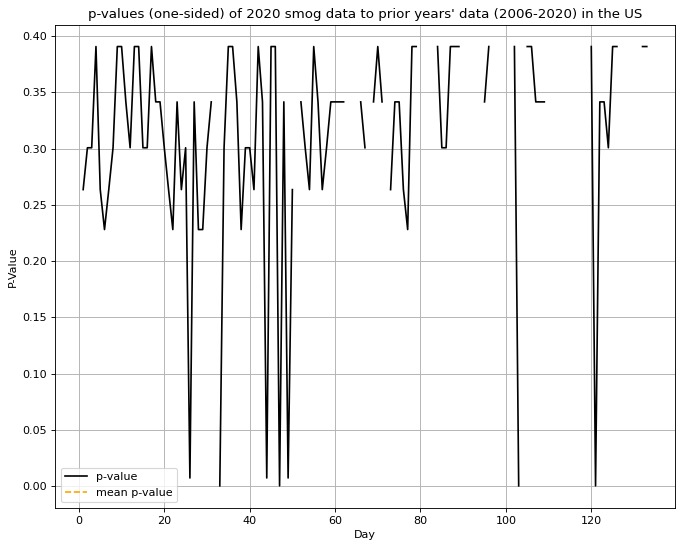

In [26]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
days = np.arange(1,len(p_values)+1, 1)
ax.plot(days,p_values,color='black',linestyle='-',label="p-value")
ax.plot(days,[mean_p_value]*len(days),color='orange',linestyle='--',label="mean p-value")
ax.set_title('p-values (one-sided) of 2020 smog data to prior years\' data (2006-2020) in the US')
ax.set_ylabel('P-Value')
ax.set_xlabel('Day')
ax.grid()
ax.legend()
# ax.set_xticks(np.arange(min(days), max(days)+1, 5.0))

## Linear Fitting days with smog with years for first 133 days

In [27]:
%%time
# print(wt08_graphs)
days = 133
wt08_days_count_byyear = []
for year in years:
#     print("000")
    wt08_count_days_thisyear = []
    for i in range(wt08_graphs.shape[0]):
        if pdf['year'][i] == year:
            wt08_count_days_thisyear.append(np.sum(wt08_graphs[i,:days]))
    wt08_days_count_byyear.append(np.mean(wt08_count_days_thisyear))

    
print(len(wt08_days_count_byyear))

15
CPU times: user 31.2 ms, sys: 0 ns, total: 31.2 ms
Wall time: 18.7 ms


In [28]:
wt08_days_count_byyear

[22.0,
 27.0,
 39.0,
 43.0,
 22.0,
 19.0,
 1.0,
 2.0,
 1.0,
 21.0,
 7.0,
 8.0,
 6.0,
 8.0,
 7.0]

In [29]:
# linear fit number of days of smogs vs year
years = map(lambda x: int(x), years)
years = list(years)
z = np.polyfit(years[:-1],wt08_days_count_byyear[:-1], 1)
p = np.poly1d(z)
# _ = plt.plot(p(years))

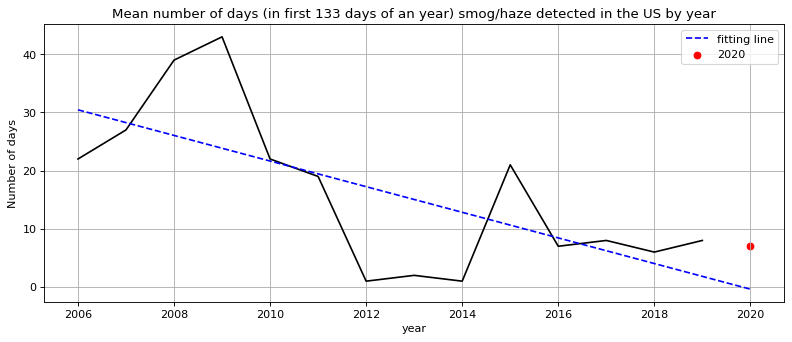

In [30]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(211)
ax1.plot(years[:-1],wt08_days_count_byyear[:-1],color='black',linestyle='-')
ax1.plot(years[:],p(years[:]),color='blue',linestyle='--', label="fitting line")
ax1.scatter(years[-1], wt08_days_count_byyear[-1], color ='red', label="2020")
ax1.set_title('Mean number of days (in first 133 days of an year) smog/haze detected in the US by year')
ax1.set_ylabel('Number of days')
ax1.set_xlabel('year')
ax1.grid()
ax1.legend()
# plt.xticks(np.arange(min(years), max(years)+1, 5.0))
# fig.autofmt_xdate()

# ax2 = plt.subplot(212)
# # ax1 = fig1.add_axes([0,1,1,1])
# ax2.plot(years[:-1],num_stations_byyear[:-1],color='black',linestyle='-')
# ax2.set_title('Total number of station in US by year')
# ax2.set_ylabel('Number of Stations')
# ax2.set_xlabel('year')
# ax2.grid()
# # plt.xticks(np.arange(min(years), max(years)+1, 5.0))
plt.tight_layout() 